In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

### Load dataset

In [54]:
from ucimlrepo import fetch_ucirepo 

parkinsons = fetch_ucirepo(id=174) 
X = parkinsons.data.features 
y = parkinsons.data.targets
 
print(parkinsons.metadata) 
print(parkinsons.variables) 

{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'ID': 385, 'type': 'NATIVE', 'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'venue': 'BioMedical Engineering OnLine', 'year': 2007, 'journal': None, 'DOI': '10.1186/1475-925X-6-23', 'URL

In [55]:
path = "https://archive.ics.uci.edu/static/public/174/data.csv"
df = pd.read_csv(path)
df.head(200)

,name,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter.1,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Data inspection

After loading and seeing the dataset, the first thing to notice are the differences between values of **PD** (at the top of the dataset) and of **normal people** (at the end of the dataset):

1) *Average vocal fundamental frequency* (MDVP:Fo) and *Maximum vocal fundamental f* (MDVP:Fhi) are much higher in normal people cause PD have difficulties into speech (more difficulties for laringeal muscles)

2) *Minimum vocal fundamental frequency* (MDVP:Flo) is lower in normal than in PD. This is quite variable and often in literature we see the opposite, the key thing is that there is a difference with normal.

3) Different measures of *variation in fundamental frequency* (MDVP:Jitter, Shimmer) are higher for PD than normal cause they can't keep a clean and costant neural potential like normal. 

We'll proceed with more accurate and statistically-rigorous analysis of the features later, for now let's continue with data exploration

In [56]:
print(f"Dataset shape: {df.shape}")
print(f"Dataset size: {df.size}")
print(df['status'].value_counts())

Dataset shape: (195, 24)
Dataset size: 4680
status
1    147
0     48
Name: count, dtype: int64


In [57]:
df.isnull().sum()

name              0
MDVP:Fo           0
MDVP:Fhi          0
MDVP:Flo          0
MDVP:Jitter       0
MDVP:Jitter.1     0
MDVP:RAP          0
MDVP:PPQ          0
Jitter:DDP        0
MDVP:Shimmer      0
MDVP:Shimmer.1    0
Shimmer:APQ3      0
Shimmer:APQ5      0
MDVP:APQ          0
Shimmer:DDA       0
NHR               0
HNR               0
status            0
RPDE              0
DFA               0
spread1           0
spread2           0
D2                0
PPE               0
dtype: int64

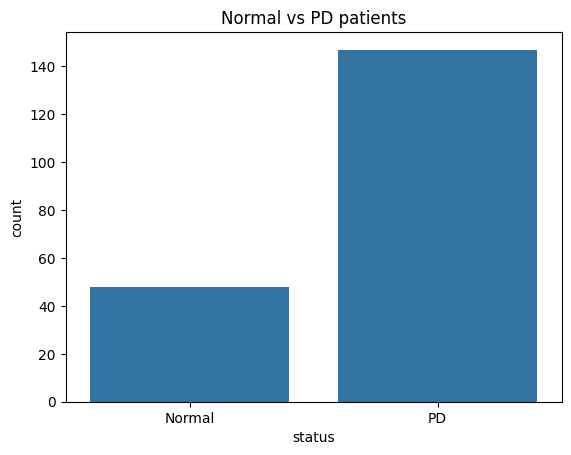

In [58]:
sns.countplot(data=df, x=df['status'])
plt.title("Normal vs PD patients")
plt.xticks(ticks=[0,1], labels=["Normal", "PD"])
plt.show()

Taking the second and third features (MDVP:Flo in x and MDVP:Fo in y) we notice a patient-specific correlation for those values and also that PD (status = 1) have lower values compared to normal. 

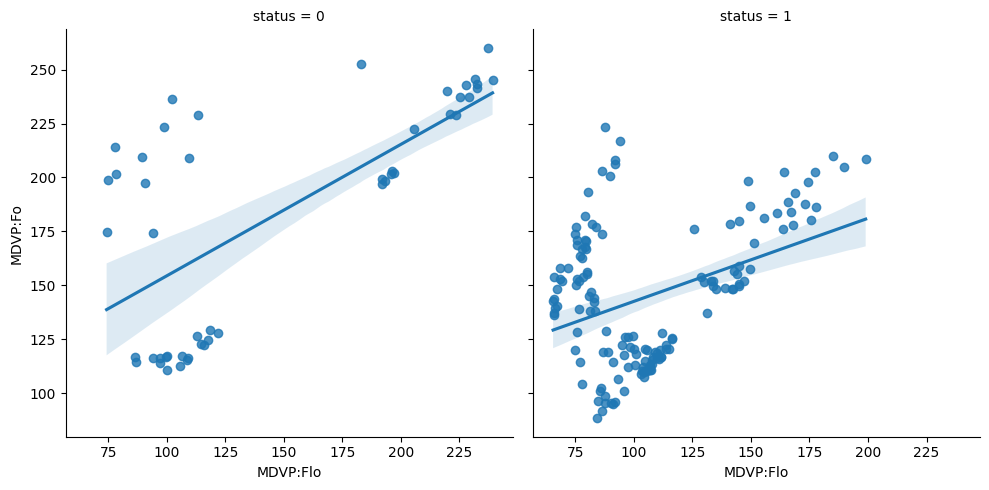

In [59]:
df_normal = df.query('status == 0')
df_PD = df.query('status == 1')

sns.lmplot(data=df, x='MDVP:Flo', y='MDVP:Fo', col='status')

### Data preprocessing and feature selection

Now I'll choose and inspect the best features for my ML model, remove target from dataset and split it into a training and a validation set.   

In [60]:
df.nunique()

name              195
MDVP:Fo           195
MDVP:Fhi          195
MDVP:Flo          195
MDVP:Jitter       173
MDVP:Jitter.1      19
MDVP:RAP          155
MDVP:PPQ          165
Jitter:DDP        180
MDVP:Shimmer      188
MDVP:Shimmer.1    149
Shimmer:APQ3      184
Shimmer:APQ5      189
MDVP:APQ          189
Shimmer:DDA       189
NHR               185
HNR               195
status              2
RPDE              195
DFA               195
spread1           195
spread2           194
D2                195
PPE               195
dtype: int64

We can see that MDVP:Jitter.1 contains the less different values but we do not have to drop any here (the seguent table is ai-generated)

| Feature           | Description (focused on Parkinson’s context) |
|-------------------|----------------------------------------------|
| name              | Patient ID, not used for analysis. |
| MDVP:Fo(Hz)       | Average vocal fundamental frequency. Parkinson’s can cause reduced control over pitch, leading to instability. |
| MDVP:Fhi(Hz)      | Maximum vocal frequency. Sudden high values may reflect tremor or loss of smooth control. |
| MDVP:Flo(Hz)      | Minimum vocal frequency. A lower-than-normal range is often linked to vocal fold rigidity. |
| MDVP:Jitter(%)    | Percent variation in cycle-to-cycle frequency. Higher jitter indicates instability, typical in Parkinson’s dysphonia. |
| MDVP:Jitter(Abs)  | Absolute jitter (in seconds). Another measure of pitch micro-instability. |
| MDVP:RAP          | Relative average perturbation (3-cycle). Short-term irregularity of frequency, sensitive to tremor. |
| MDVP:PPQ          | Pitch perturbation quotient (5-cycle). Captures mid-term frequency fluctuations. |
| Jitter:DDP        | Average absolute difference of period lengths (~3×RAP). Highlights frequency irregularity. |
| MDVP:Shimmer      | Cycle-to-cycle variation in amplitude. Parkinson’s often leads to uneven loudness. |
| MDVP:Shimmer(dB)  | Shimmer expressed in dB. Directly interpretable as loudness instability. |
| MDVP:Shimmer.1    | Alternative shimmer calculation. Confirms robustness of amplitude variability. |
| Shimmer:APQ3      | Amplitude perturbation over 3 cycles. Local measure of loudness irregularity. |
| Shimmer:APQ5      | Amplitude perturbation over 5 cycles. Mid-term amplitude variation. |
| MDVP:APQ          | Amplitude perturbation over 11 cycles. Captures longer irregular trends. |
| Shimmer:DDA       | Three-point average absolute difference of amplitude. Sensitive to micro-amplitude changes. |
| NHR               | Noise-to-harmonics ratio. Parkinson’s voices often have more breathiness/noise. |
| HNR               | Harmonics-to-noise ratio. Lower HNR = rougher, noisier voice, common in Parkinson’s. |
| status            | Class label: 1 = Parkinson’s, 0 = healthy control. |
| RPDE              | Recurrence Period Density Entropy. Detects nonlinear irregularity; higher values = more erratic phonation. |
| DFA               | Detrended Fluctuation Analysis. Shows long-range correlations; altered by impaired neuromuscular control. |
| spread1           | First spectral spread measure. Broader spreads = unstable pitch, linked to motor impairment. |
| spread2           | Second spectral spread measure. Complements spread1 for robustness. |
| D2                | Correlation dimension, a fractal measure of complexity. Lower values suggest reduced vocal dynamical richness. |
| PPE               | Pitch Period Entropy. Captures unpredictability of pitch; Parkinson’s often increases pitch randomness. |


In [ ]:
# Identify the feature with the fewest unique values 
num_uniques = df.drop(columns=['status','name'], errors='ignore').nunique().sort_values()
print("Feature counts by uniqueness (ascending):")
print(num_uniques.head(10))
print("\nLeast unique feature appears to be:", num_uniques.index[0], "with", num_uniques.iloc[0], "unique values")

Feature counts by uniqueness (ascending):
MDVP:Jitter.1      19
MDVP:Shimmer.1    149
MDVP:RAP          155
MDVP:PPQ          165
MDVP:Jitter       173
Jitter:DDP        180
Shimmer:APQ3      184
NHR               185
MDVP:Shimmer      188
Shimmer:APQ5      189
dtype: int64

Least unique feature appears to be: MDVP:Jitter.1 with 19 unique values


In [62]:
# The goal here is to use t-student to evaluate the power of feature 
# to use and create the algorithm, later use ROC or other way to inspect the accuracy
# of our model

#ok the first thing is to evaluate if the first 2 features seen have statistc significance
#instead of using t I'll use F classific cause it's more general and the only on scikit
X = df.drop(columns=['status', 'name'])
y = df['status']

selector = SelectKBest(score_func=f_classif, k=2).fit(X, y)

scores = pd.DataFrame({
    "Feature": X.columns,
    "F-score": selector.scores_,
    "p-value": selector.pvalues_
}).sort_values(by="F-score", ascending=False)
print(scores)

           Feature    F-score       p-value
18         spread1  90.424219  7.909651e-18
21             PPE  75.803195  1.392619e-15
19         spread2  50.343165  2.391729e-11
0          MDVP:Fo  33.286577  3.121919e-08
2         MDVP:Flo  32.612875  4.197004e-08
8     MDVP:Shimmer  30.122600  1.264702e-07
12        MDVP:APQ  29.536350  1.643238e-07
15             HNR  29.015927  2.074677e-07
11    Shimmer:APQ5  27.145033  4.823575e-07
9   MDVP:Shimmer.1  27.065484  5.000743e-07
10    Shimmer:APQ3  26.527120  6.386194e-07
13     Shimmer:DDA  26.525626  6.390539e-07
20              D2  25.265912  1.135925e-06
4    MDVP:Jitter.1  25.001729  1.282252e-06
16            RPDE  20.310049  1.139896e-05
6         MDVP:PPQ  17.548533  4.257767e-05
3      MDVP:Jitter  16.192809  8.209989e-05
5         MDVP:RAP  14.775226  1.643393e-04
7       Jitter:DDP  14.772666  1.645466e-04
17             DFA  10.952901  1.115116e-03
14             NHR   7.183270  7.994851e-03
1         MDVP:Fhi   5.478255  2

Ok we found more powerful features that the ones watched by eye, it seems those are the most significant so better explain them again 
1) Spread 1/2: measures the spread of the signal and so the chaos in the measures of voice signal
2) Picth Period Entropy: indicator of unpredictability of the sound

In particular we found that every feature, except for MDVP:Fhi, can already be used alone to identify PD vs normal with a significance of 0.01 (but even with Fhi we'll get a 0.05)

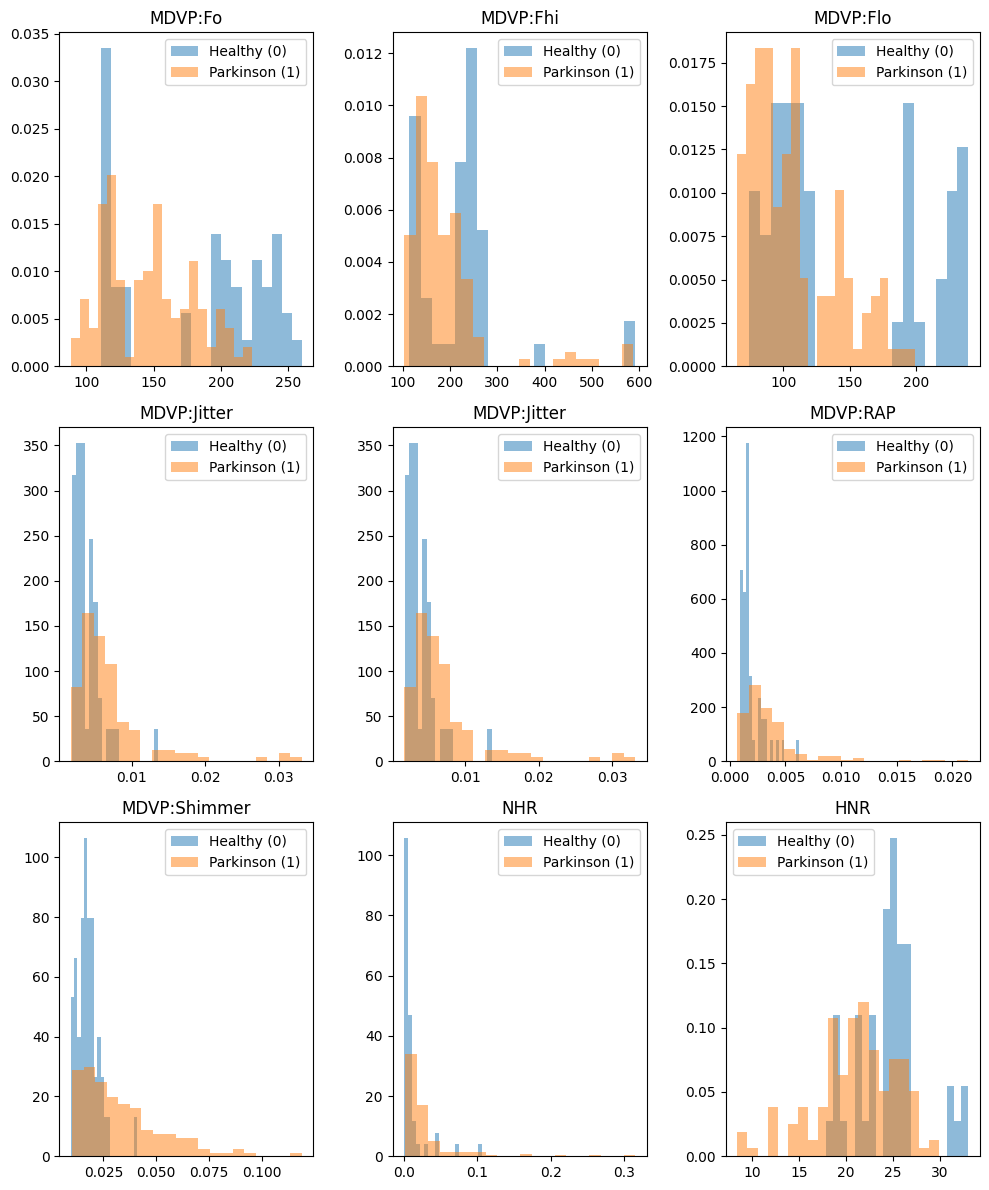

In [63]:
# Plot distributions per class (in this case status) for a set of key features

features_to_plot = [
    'MDVP:Fo','MDVP:Fhi','MDVP:Flo',
    'MDVP:Jitter','MDVP:Jitter','MDVP:RAP',
    'MDVP:Shimmer','MDVP:Shimmer(dB)','NHR','HNR'
]

available = [f for f in features_to_plot if f in df.columns]
cols = 3
rows = 3

fig = plt.figure(figsize=(10, 4*rows))
for i, feat in enumerate(available, 1):
    ax = fig.add_subplot(rows, cols, i)
    class0 = df.loc[df['status']==0, feat].dropna()
    class1 = df.loc[df['status']==1, feat].dropna()
    ax.hist(class0, bins=20, alpha=0.5, label='Healthy (0)', density=True)
    ax.hist(class1, bins=20, alpha=0.5, label='Parkinson (1)', density=True)
    ax.set_title(feat)
    ax.legend(loc='best')
plt.tight_layout()
plt.show()

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2

# Separate features/target ensuring numeric only
X_num = df.drop(columns=['status', 'name'], errors='ignore').select_dtypes(include=[np.number]).copy()
y_series = df['status'].astype(int)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_num.values)
chi2_scores, pvals = chi2(X_scaled, y_series.values)

chi2_df = pd.DataFrame({
    'feature': X_num.columns,
    'chi2': chi2_scores,
    'p_value': pvals
}).sort_values('chi2', ascending=False).reset_index(drop=True)

chi2_df.head(15)

,feature,chi2,p_value
0,MDVP:Flo,6.014075,0.014192
1,spread1,5.832052,0.015737
2,PPE,5.680013,0.017159
3,MDVP:Fo,4.319120,0.037686
4,MDVP:Shimmer,4.215342,0.040060
5,Shimmer:APQ3,4.187889,0.040714
6,Shimmer:DDA,4.185769,0.040765
7,Shimmer:APQ5,3.853073,0.049655
8,MDVP:Shimmer.1,3.774658,0.052035
9,MDVP:APQ,3.352370,0.067108


As we can see, χ² gives results very similar to the t-test, with the exception of **MDVP:Flo**, which shows the lowest p-value. This happens because the χ² test can *capture differences in how the feature values are distributed between the two classes*, not just differences in the mean. While the t-test focuses only on average differences, χ² is also sensitive to distributional variations (including spread and non-linear patterns).

### Pipeline construction
#### 1.Split data into train and validation sets
Select top-k features from the chi² ranking and split the dataset into stratified train/test sets to preserve class balance.

In [65]:
from sklearn.model_selection import train_test_split

topk = 12
selected_features = chi2_df.head(topk)['feature'].tolist()
X_all = df[selected_features].values
y_all = df['status'].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, stratify=y_all, random_state=42
)

X_train.shape, X_test.shape

((156, 12), (39, 12))

#### 2.Model comparison with Cross-Validation
Compare several classifiers (LogReg, SVC, RF, MLP) using 5-fold stratified CV and report mean accuracy, F1, and ROC AUC.

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

models = {
    "LogReg": Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=500))]),
    "SVC": Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True))]),
    "RF": RandomForestClassifier(n_estimators=300, random_state=42),
    "MLP": Pipeline([('scaler', StandardScaler()), ('clf', MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42))])
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for name, model in models.items():
    res = cross_validate(model, X_all, y_all, cv=cv,
                         scoring=['accuracy','f1','roc_auc'],
                         n_jobs=None, return_train_score=False)
    scores.append({
        'model': name,
        'acc_mean': res['test_accuracy'].mean(),
        'f1_mean': res['test_f1'].mean(),
        'roc_auc_mean': res['test_roc_auc'].mean()
    })
cv_results = pd.DataFrame(scores).sort_values('roc_auc_mean', ascending=False)
cv_results


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,model,acc_mean,f1_mean,roc_auc_mean
3,MLP,0.907692,0.938609,0.968352
2,RF,0.902564,0.937741,0.962043
0,LogReg,0.835897,0.895256,0.900868
1,SVC,0.866667,0.918178,0.879413


#### 3.Preprocessing & model pipeline (SVC)
Build a pipeline (scaler + SVC with probability) and define the hyperparameter grid to be explored later via GridSearchCV.

In [67]:

from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True))])
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

pipe, param_grid

(Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(probability=True))]),
 {'svc__C': [0.1, 1, 10, 100],
  'svc__gamma': ['scale', 0.01, 0.1, 1],
  'svc__kernel': ['rbf']})

#### 4.Hyperparameter tuning of best model
Run GridSearchCV on the SVC pipeline using 5-fold stratified CV and ROC AUC as the selection metric; keep the best estimator for final testing.

In [68]:
grid = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=cv)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best CV ROC AUC:", grid.best_score_)


Best params: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV ROC AUC: 0.9603972567287784


#### 5.Evaluate tuned model performance
Evaluate the tuned model on the held-out test set: classification report, confusion matrix, and ROC curve (with AUC).

Classification report (test):
              precision    recall  f1-score   support

           0      0.800     0.800     0.800        10
           1      0.931     0.931     0.931        29

    accuracy                          0.897        39
   macro avg      0.866     0.866     0.866        39
weighted avg      0.897     0.897     0.897        39

Confusion matrix:
 [[ 8  2]
 [ 2 27]]


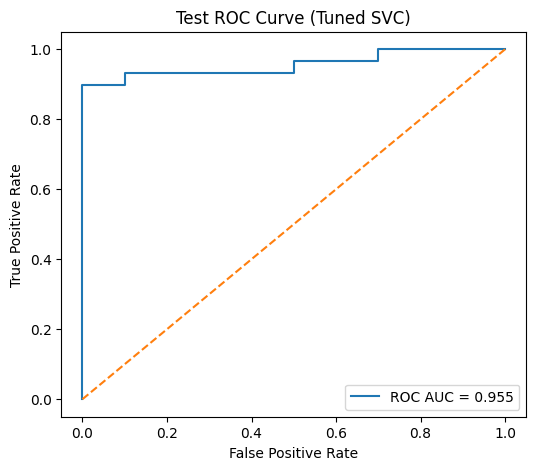

In [69]:
# Evaluate tuned model on test set (classification report + confusion matrix + ROC)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

y_proba = best_model.predict_proba(X_test)[:,1]
y_pred = (y_proba >= 0.5).astype(int)

print("Classification report (test):")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve (Tuned SVC)')
plt.legend(loc='lower right')
plt.show()


### Post Hoc Analysis
Use permutation importance on the test set to estimate which selected features contribute most to the tuned model’s predictions.

In [70]:
# Post-hoc: permutation importance on test set
from sklearn.inspection import permutation_importance

r = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)
importances = r.importances_mean
indices = np.argsort(importances)[::-1]

print("Top features by permutation importance:")
for i in indices[:10]:
    print(f"{selected_features[i]}: {importances[i]:.4f}")

Top features by permutation importance:
spread1: 0.1444
MDVP:Fo: 0.1239
MDVP:Flo: 0.0564
Shimmer:APQ5: 0.0538
spread2: 0.0487
MDVP:APQ: 0.0376
PPE: 0.0316
Shimmer:DDA: 0.0308
Shimmer:APQ3: 0.0308
MDVP:Shimmer.1: 0.0274
